## **Reconstruction**

### Prepare the data
* Import related libraries
* Load data
  * Divide your dataset into training (80%), validation (10%) and test (10%). Normalize the data.
  * \# of training instances: 60000 * 80% = 48000
  * \# of validation/test instances: 60000 * 10% = 6000 each

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras

In [ ]:
#import CIFAR-10 dataset
#won't need the labels, so leave y_train, y_test empty
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)

In [ ]:
#preprocessing 
x_all = np.vstack((x_train, x_test))

#Normalize the data
x_all = x_all.astype('float32') / 255

#Split into train, validation, test 
x_train, x_validate, x_test = np.split(x_all, [int(0.8*60000), int(0.9*60000)])

In [ ]:
#check the shape 
print(x_train.shape, x_validate.shape, x_test.shape)

(48000, 32, 32, 3) (6000, 32, 32, 3) (6000, 32, 32, 3)


### Build the encoder/decoder network
* Define each layer of CNN, in total 9 layers
* Compile and output the network summary

In [ ]:
#Encoder  
input_img = keras.layers.Input(shape=(32, 32, 3))                          
x = keras.layers.Conv2D(8, (3, 3), activation = 'relu', strides=1, padding = 'same')(input_img)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(x)

#Decoder 
x  = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(3, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)


In [ ]:
autoencoder = keras.models.Model(input_img, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 16)        0     

In [ ]:
# try fit the data for 10 epochs
cnn = autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_validate, x_validate))

Epoch 1/10
1500/1500 [==============================] - 16s 6ms/step - loss: 0.6048 - val_loss: 0.5775
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5730 - val_loss: 0.5703
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5764 - val_loss: 0.5709
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5755 - val_loss: 0.6280
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5697 - val_loss: 0.5711
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5720 - val_loss: 0.5683
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5692 - val_loss: 0.5778
Epoch 8/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5673 - val_loss: 0.5658
Epoch 9/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5713 - val_loss: 0.5667
Epoch 10/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0

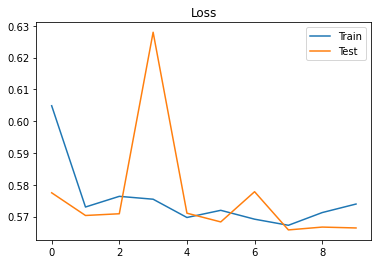

In [ ]:
#Plot training errors & testing errors
plt.title("Loss")
plt.plot(cnn.history['loss'],  label='Train')
plt.plot(cnn.history['val_loss'],  label='Test')
plt.legend()
plt.show()

### Reconstruct the images

#### Config 1
* epochs=10
* loss="binary_crossentropy"
* activation = 'relu', for all layers

In [ ]:
# Reconstruct the image using test set
output_img = autoencoder.predict(x_test)

In [ ]:
#define a function to display 12 original(true) images 
#in comparison with 12 re-construction images

def reconstruct(array_true, array_pred):
  fig, axes = plt.subplots(1, 12, figsize=(12, 12))
  for i, ax in enumerate(axes.flat):
    ax.imshow(array_true[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  fig, axes = plt.subplots(1, 12, figsize=(12, 12))
  for i, ax in enumerate(axes.flat):
    ax.imshow(array_pred[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


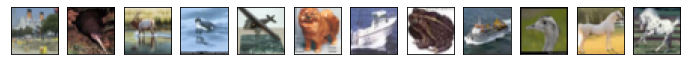

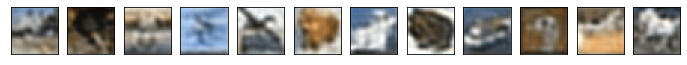

In [ ]:
# compare the origin with the reconstructed output
reconstruct(x_test, output_img)

---

* try fit the data for 25, 50, 75 epochs respectively

#### Config 2
* epochs=25
* loss="binary_crossentropy"
* activation = 'relu', for all layers


In [ ]:
# try fit the data for 25 epochs
cnn = autoencoder.fit(x_train, x_train, epochs= 25, validation_data=(x_validate, x_validate), shuffle=True)

Epoch 1/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5707 - val_loss: 0.5670
Epoch 2/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5669 - val_loss: 0.5660
Epoch 3/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5688 - val_loss: 0.5650
Epoch 4/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5669 - val_loss: 0.5701
Epoch 5/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5666 - val_loss: 0.5764
Epoch 6/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5651 - val_loss: 0.5711
Epoch 7/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5657 - val_loss: 0.5647
Epoch 8/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5652 - val_loss: 0.5629
Epoch 9/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5669 - val_loss: 0.5639
Epoch 10/25
1500/1500 [==============================] - 10s 7ms/step - l

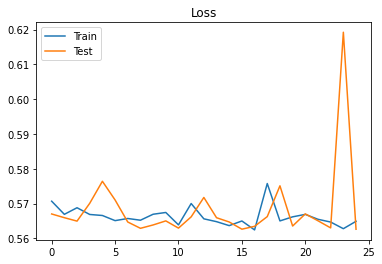

In [ ]:
#Plot training errors & testing errors
plt.title("Loss")
plt.plot(cnn.history['loss'],  label='Train')
plt.plot(cnn.history['val_loss'],  label='Test')
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


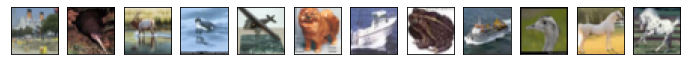

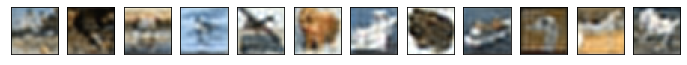

In [ ]:
# Reconstruct the image using test set
output_img = autoencoder.predict(x_test)
# compare the origin with the reconstructed output
reconstruct(x_test, output_img)

#### Config 3
* epochs=50
* loss="MeanSquaredError"
* activation = 'relu', for all layers


In [ ]:
#change the loss function to MSE
autoencoder = keras.models.Model(input_img, x)
autoencoder.compile(optimizer="adam", loss="MeanSquaredError")
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 16)        0   

In [ ]:
# try fit the data for 50 epochs
cnn = autoencoder.fit(x_train, x_train, epochs= 50, validation_data=(x_validate, x_validate), shuffle=True)

Epoch 1/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 4/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 6/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 7/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 8/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 9/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 10/50
1500/1500 [==============================] - 10s 6ms/step - loss: 

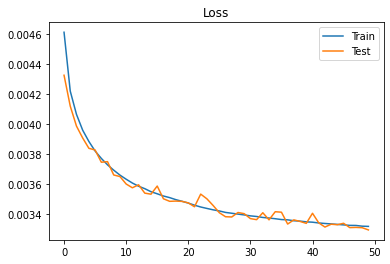

In [ ]:
#Plot training errors & testing errors
plt.title("Loss")
plt.plot(cnn.history['loss'],  label='Train')
plt.plot(cnn.history['val_loss'],  label='Test')
plt.legend()
plt.show()

#### Config 4
* epochs=50
* loss="binary_crossentropy"
* activation = 'relu', for all layers **except the last**, last activation = 'sigmoid'

In [ ]:
#Encoder  
input_img = keras.layers.Input(shape=(32, 32, 3))                          
x = keras.layers.Conv2D(8, (3, 3), activation = 'relu', strides=1, padding = 'same')(input_img)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(x)

#Decoder 
x  = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(3, (3, 3), activation = 'sigmoid', strides=1, padding = 'same')(x)

autoencoder = keras.models.Model(input_img, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 16)        0     

In [ ]:
# try fit the data for 50 epochs
cnn = autoencoder.fit(x_train, x_train, epochs= 50, validation_data=(x_validate, x_validate), shuffle=True)

Epoch 1/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5750 - val_loss: 0.5664
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5641 - val_loss: 0.5644
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5623 - val_loss: 0.5636
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5612 - val_loss: 0.5618
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5605 - val_loss: 0.5611
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5599 - val_loss: 0.5606
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5595 - val_loss: 0.5603
Epoch 8/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5592 - val_loss: 0.5601
Epoch 9/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5589 - val_loss: 0.5600
Epoch 10/50
1500/1500 [==============================] - 10s 7ms/step - l

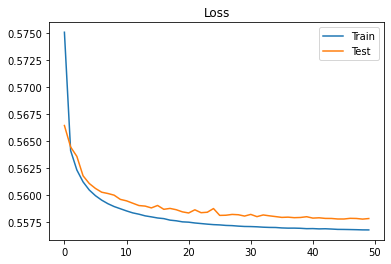

In [ ]:
#Plot training errors & testing errors
plt.title("Loss")
plt.plot(cnn.history['loss'],  label='Train')
plt.plot(cnn.history['val_loss'],  label='Test')
plt.legend()
plt.show()

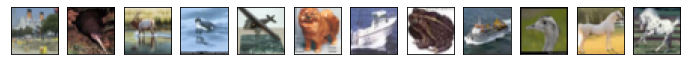

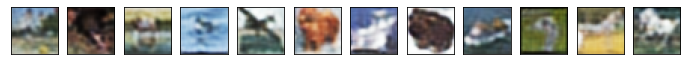

In [ ]:
# Reconstruct the image using test set
output_img = autoencoder.predict(x_test)

# compare the origin with the reconstructed output
reconstruct(x_test, output_img)

#### Config 5
* epochs=75
* loss="binary_crossentropy"
* activation = 'relu', for all layers **except the last**, last activation = 'sigmoid'

In [ ]:
# try fit the data for 75 epochs
cnn = autoencoder.fit(x_train, x_train, epochs= 75, validation_data=(x_validate, x_validate), shuffle=True)

Epoch 1/75
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5755 - val_loss: 0.5668
Epoch 2/75
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5637 - val_loss: 0.5640
Epoch 3/75
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5619 - val_loss: 0.5624
Epoch 4/75
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5608 - val_loss: 0.5616
Epoch 5/75
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5601 - val_loss: 0.5607
Epoch 6/75
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5596 - val_loss: 0.5603
Epoch 7/75
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5592 - val_loss: 0.5603
Epoch 8/75
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5589 - val_loss: 0.5598
Epoch 9/75
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5587 - val_loss: 0.5597
Epoch 10/75
1500/1500 [==============================] - 10s 7ms/step - l

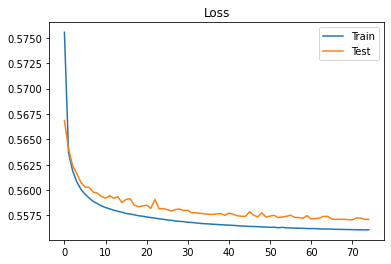

In [ ]:
#Plot training errors & testing errors
plt.title("Loss")
plt.plot(cnn.history['loss'],  label='Train')
plt.plot(cnn.history['val_loss'],  label='Test')
plt.legend()
plt.show()

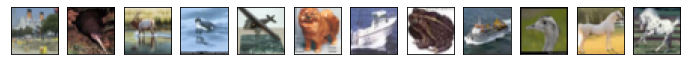

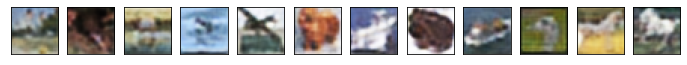

In [ ]:
# Reconstruct the image using test set
output_img = autoencoder.predict(x_test)

# compare the origin with the reconstructed output
reconstruct(x_test, output_img)

---
## **Colorization**

In [3]:
#import CIFAR-10 dataset
#won't need the labels, so leave y_train, y_test empty
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
#Preprocessing 
x_all = np.vstack((x_train, x_test))
#Normalize the data
x_norm = x_all.astype('float32') / 255

#Revome colors
x_grey = np.sum(x_norm, axis=3).reshape((60000, 32, 32, 1)) / 3

#Split into train, validation, test
x_train, x_validate, x_test = np.split(x_norm, [int(0.8*60000), int(0.9*60000)]) 
x_gtrain, x_gvalidate, x_gtest = np.split(x_grey, [int(0.8*60000), int(0.9*60000)])

In [5]:
#check the shape 
print(x_train.shape, x_validate.shape, x_test.shape)
print(x_gtrain.shape, x_gvalidate.shape, x_gtest.shape)

(48000, 32, 32, 3) (6000, 32, 32, 3) (6000, 32, 32, 3)
(48000, 32, 32, 1) (6000, 32, 32, 1) (6000, 32, 32, 1)


In [6]:
#Encoder  
input_img = keras.layers.Input(shape=(32, 32, 1))                          
x = keras.layers.Conv2D(8, (3, 3), activation = 'relu', strides=1, padding = 'same')(input_img)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(x)

#Decoder 
x  = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(12, (3, 3), activation = 'relu', strides=1, padding = 'same')(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2D(3, (3, 3), activation = 'sigmoid', strides=1, padding = 'same')(x)

autoencoder = keras.models.Model(input_img, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 16)        0     

In [7]:
# try fit the data for 10 epochs
cnn = autoencoder.fit(x=x_gtrain, y=x_train, epochs= 10, validation_data=(x_gvalidate, x_validate), shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 40s 7ms/step - loss: 0.5823 - val_loss: 0.5754
Epoch 2/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5730 - val_loss: 0.5735
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5718 - val_loss: 0.5725
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5711 - val_loss: 0.5720
Epoch 5/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5706 - val_loss: 0.5714
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5702 - val_loss: 0.5716
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5699 - val_loss: 0.5708
Epoch 8/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5696 - val_loss: 0.5706
Epoch 9/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5695 - val_loss: 0.5707
Epoch 10/10
1500/1500 [==============================] - 10s 6ms/step - lo

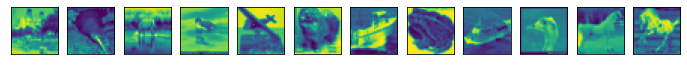

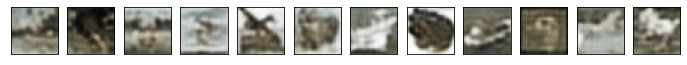

In [11]:
# Reconstruct the image using gray test set
output_img_g = autoencoder.predict(x_gtest)


fig, axes = plt.subplots(1, 12, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_gtest[i].reshape(32,32))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  

fig, axes = plt.subplots(1, 12, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
  ax.imshow(output_img_g[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
plt.show()